In [23]:
import numpy as np
import numpy.linalg as alg
import matplotlib.pyplot as plt

# Question 1

In [3]:
A = np.array([[4/5, 0, 0],
              [0, np.sqrt(3), 1],
              [0, -1, np.sqrt(3)]])
alg.eigvals(A)

array([1.73205081+1.j, 1.73205081-1.j, 0.8       +0.j])

In [4]:
eigenvalues, eigenvectors = alg.eig(A)

In [5]:
eigenvectors

array([[0.        +0.j        , 0.        -0.j        ,
        1.        +0.j        ],
       [0.70710678+0.j        , 0.70710678-0.j        ,
        0.        +0.j        ],
       [0.        +0.70710678j, 0.        -0.70710678j,
        0.        +0.j        ]])

In [6]:
alg.matrix_rank(eigenvectors)

3

In [7]:
is_stable = np.all(np.abs(eigenvalues) < 1)
print(f"This system is {'stable' if is_stable else 'unstable'}")

This system is unstable


In [8]:
eigenvalues

array([1.73205081+1.j, 1.73205081-1.j, 0.8       +0.j])

In [12]:
abs(eigenvalues[0])

1.9999999999999998

In [ ]:
np.hstack()

In [13]:
B = np.array([[0, 0], [1, 1], [1, 0]])

In [32]:
def simulate_LDS(t: float, T: float, x_init: np.ndarray, policy: np.ndarray):
    """
    t: float
        Time step to iterate the LDS by.
        units: seconds
    T: float
        Time Horizon of the problem.
        units: Minutes
    x_init: np.ndarray
        Initial Condition of the LDS
    """
    num_steps = int(T * 60 * t)
    print(num_steps)
    state_history = np.zeros((3, num_steps))
    x_t = x_init
    state_history[:, 0] = x_t.flatten()

    for step in range(num_steps - 1):
        x_t = A @ x_t + (B @ policy[:, step]).reshape((3, 1))
        state_history[:, step+1] = x_t.flatten()
    
    return state_history

In [36]:
x1 = np.zeros((3, 1))
x1[1, 0] = 1
open_control=np.zeros((2, 119))
open_loop_lds = simulate_LDS(1, 1, x1, open_control)

60


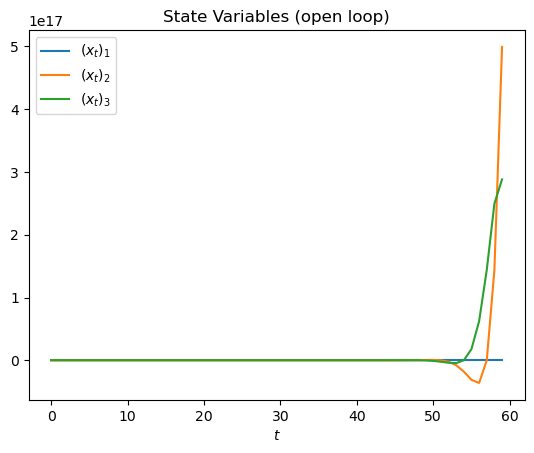

In [37]:
for i in range(open_loop_lds.shape[0]):
    plt.plot(np.arange(60), open_loop_lds[i, :], label=f'$(x_t)_{i+1}$')

plt.xlabel('$t$')
plt.title('State Variables (open loop)')
plt.legend()

plt.show()